##### Edges
- Edges are significatn local changes of intensity in a digital image.
- An edge can be defined as a set of connected pixels that forms a boundary between two disjoint regions.
- There are three types of edges:
    * Horizontal edges
    * Vertical edges
    * Diagonal edges

##### Sobel Edge Detection
- It uses two 3x3 kernels or masks which are convlved with the input image to calculate the vertifical and horizontal derivative approximations respectively.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
help(cv2.Sobel)

Help on built-in function Sobel:

Sobel(...)
    Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
    .   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
    .   
    .   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
    .   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
    .   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
    .   or the second x- or y- derivatives.
    .   
    .   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
    .   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
    .   
    .   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
    .   
    .   for the x-derivative, or transposed for the y-derivative.
    . 

In [14]:
img = cv2.imread('images/sachin.jpg', 0)

In [16]:
# Define Sobel operators
sobelx = cv2.Sobel(img, 
                   cv2.CV_64F, 
                   1, 
                   0, 
                   ksize=3)

sobely = cv2.Sobel(img, 
                   cv2.CV_64F, 
                   0, 
                   1, 
                   ksize=3)

In [17]:
final_sobel = cv2.add(sobelx, sobely)

In [18]:
final_sobel

array([[  0.,   0.,   0., ...,  -2.,   0.,   0.],
       [  0.,   0.,   0., ...,  -8., -12., -12.],
       [  4.,   4.,   4., ...,  -6.,  -2.,   4.],
       ...,
       [ 46.,  54.,  42., ..., -38., -26.,  -8.],
       [  8.,  16.,  10., ..., -16.,  -8.,   0.],
       [  0.,   8.,   2., ...,  -4.,  -2.,   0.]])

In [19]:
thresh, binary_sobel = cv2.threshold(final_sobel, 
                                     60, 
                                     255, 
                                     cv2.THRESH_BINARY)

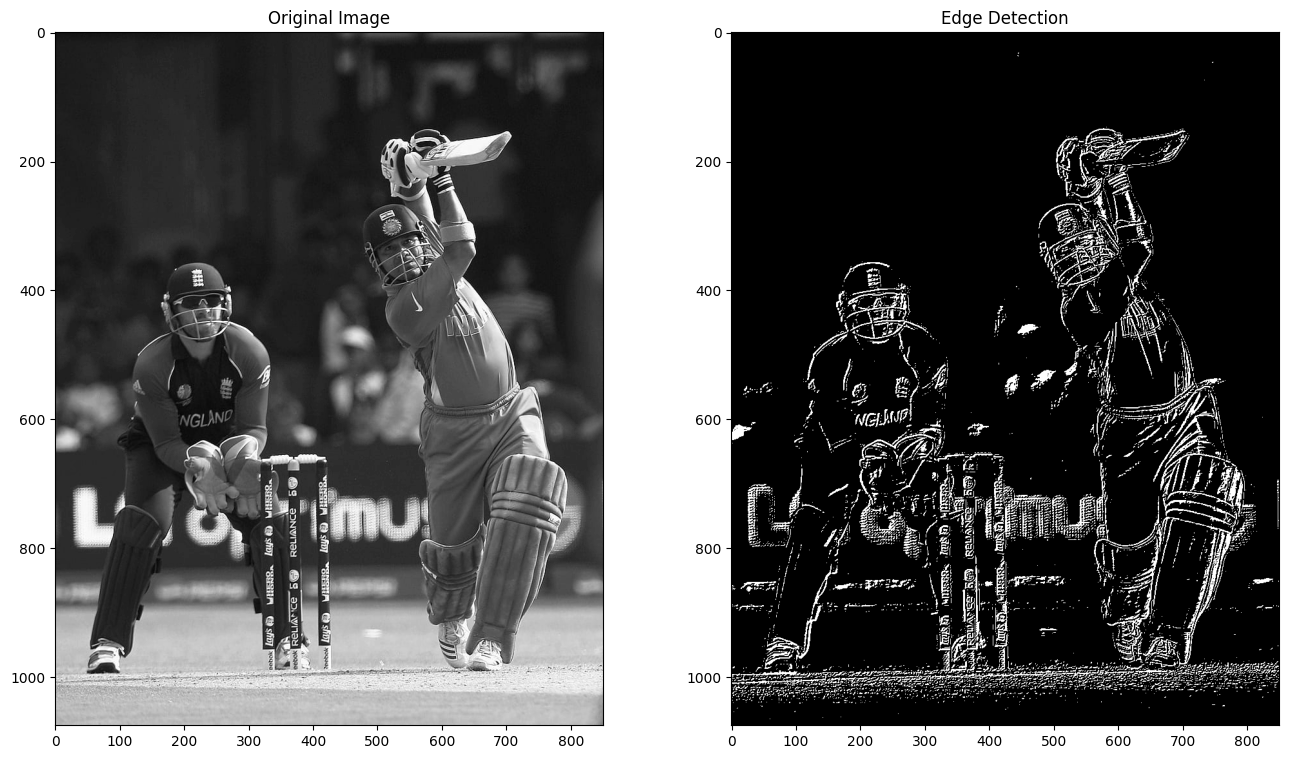

In [20]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Edge Detection')
plt.imshow(binary_sobel, cmap='gray')

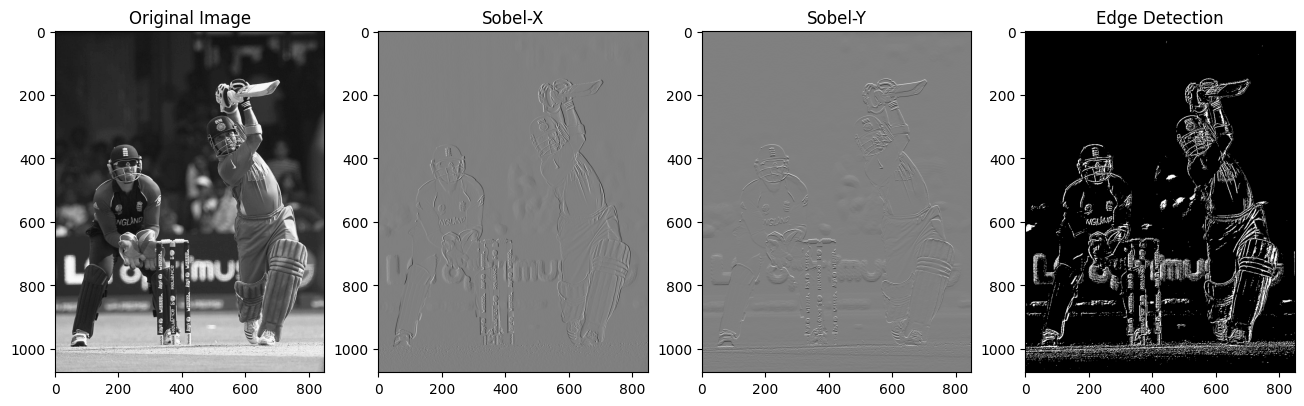

In [21]:
plt.figure(figsize=(16,9))

plt.subplot(1,4,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,4,2)
plt.title('Sobel-X')
plt.imshow(sobelx, cmap='gray')

plt.subplot(1,4,3)
plt.title('Sobel-Y')
plt.imshow(sobely, cmap='gray')

plt.subplot(1,4,4)
plt.title('Edge Detection')
plt.imshow(binary_sobel, cmap='gray')

#### Canny Edge Detection
* A multi-stage detection algorithm developed by John F. Canny in 1986.
* Aims to find wide range of edges while 

In [23]:
#### Canny Edge Detection

In [22]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .   
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .   
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \

In [24]:
edges = cv2.Canny(img,
                  60,  # lower threshold
                  225) # upper threshold

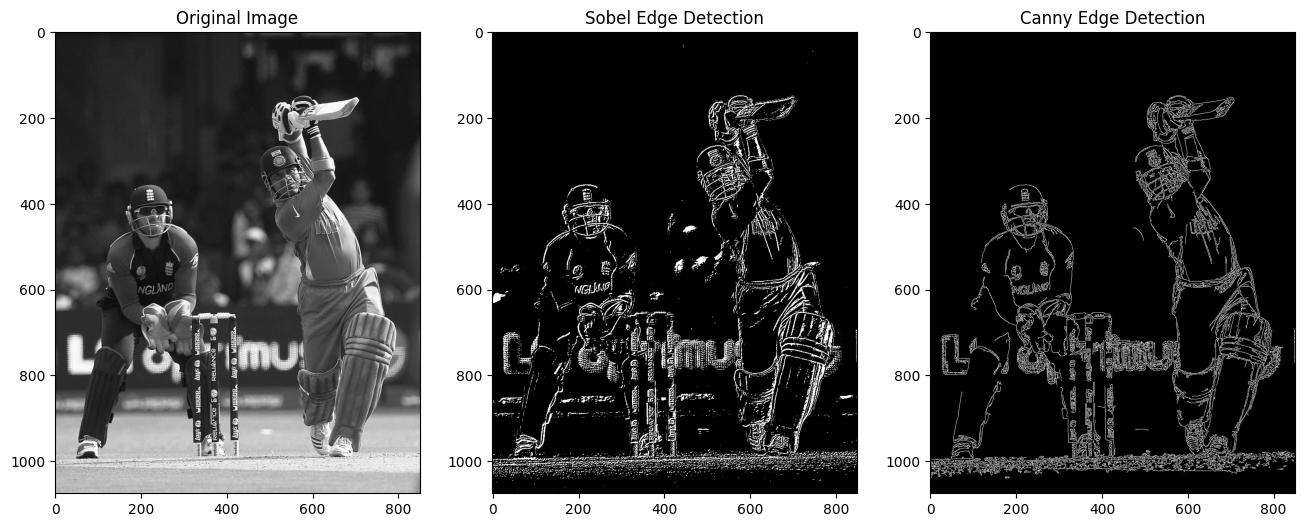

In [28]:
plt.figure(figsize=(16,9))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,3,2)
plt.title('Sobel Edge Detection')
plt.imshow(binary_sobel, cmap='gray')

plt.subplot(1,3,3)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')

In [32]:
# import the file circle.png
img_cir = cv2.imread('images/circle.png', 0) # 0 indicates loading the image in grayscale

In [45]:
# Define Sobel operators
sobelx = cv2.Sobel(img_cir, 
                   cv2.CV_64F, 
                   1, 
                   0, 
                   ksize=3)

sobely = cv2.Sobel(img_cir, 
                   cv2.CV_64F, 
                   0, 
                   1, 
                   ksize=3)

In [46]:
final_sobel = cv2.add(sobelx, sobely)

In [48]:
thresh, binary_sobel = cv2.threshold(final_sobel, 
                                     60, 
                                     225, 
                                     cv2.THRESH_BINARY)

In [49]:
# Canny Edge Detection
edges = cv2.Canny(img_cir, # image needs to be a grayscale image (2D) for the algorithm to work
                  60,  # lower threshold
                  225) # upper threshold

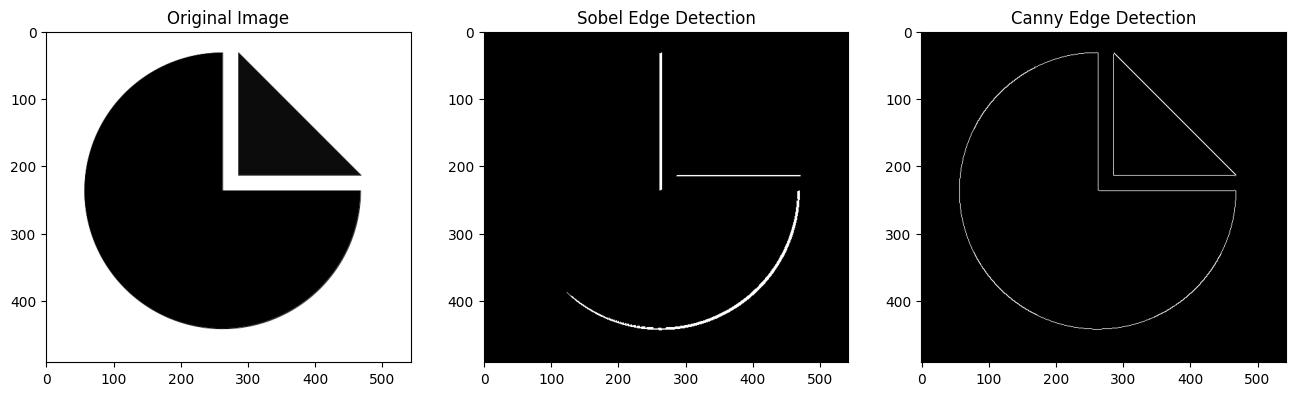

In [50]:
plt.figure(figsize=(16,9))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img_cir, cmap='gray')

plt.subplot(1,3,2)
plt.title('Sobel Edge Detection')
plt.imshow(binary_sobel, cmap='gray')

plt.subplot(1,3,3)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')